In [1]:
import collections
import pathlib

# データ処理周り
import numpy as np
import pandas as pd
from IPython.core.display import display

# 可視化ライブラリ
import matplotlib.pyplot as plt
from matplotlib import cm # colormap
import seaborn as sns
%matplotlib inline

# pandasのwarningが邪魔
import warnings
warnings.filterwarnings('ignore')

# options
# pd.set_option('display.max_columns', 50)
plt.style.use('ggplot')

In [2]:
from PIL import Image
import sys
sys.path.append('..')

In [3]:
from utils import converter

## csv読み込み

In [4]:
data_path = pathlib.Path('../data/')

In [5]:
depths = pd.read_csv(data_path / 'depths.csv')
train = pd.read_csv(data_path / 'train.csv')
depths.shape, train.shape

((22000, 2), (4000, 2))

## 画像を見てみる

- 茶色で色を重ねてる部分がmask(正解部分)
- 図を見ただけだと難しい

In [ ]:
row, col = 8, 5
fig = plt.figure(figsize=(col * 5, row * 4))
files = (data_path / 'train' / 'images' ).glob('*.png')

for i in range(row*col):
    ax = fig.add_subplot(row, col, i + 1)

    filepath = next(files)
    im = np.asarray(Image.open(filepath))
    depth = depths[depths['id'] == filepath.stem]['z'].values[0]
    
    ax.imshow(im)
    ax.set_title("depth: {}".format(depth))
   
    mask_path= (data_path / 'train' / 'masks' ) / filepath.name
    mask = np.asarray(Image.open(mask_path))
    ax.imshow(mask, cmap='Reds', alpha=0.2)
    ax.grid(False)

## 深さと正解マスクの関係性

In [16]:
merged = train.merge(depths, on='id', how='left')
merged['salt_count'] = merged.rle_mask.astype(str).fillna(0).apply(converter.count_array_mask)
merged.rename(columns={'z': 'depth'}, inplace=True)

Text(0.5,1,'深さと塩面積の散布図')

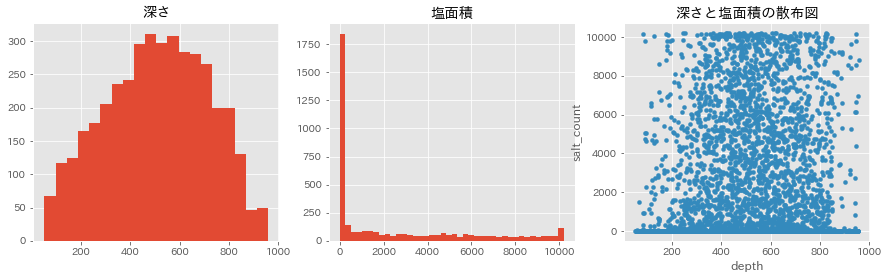

In [35]:
row, col = 1, 3
fig = plt.figure(figsize=(col * 5, row * 4))

ax = fig.add_subplot(row, col, 1)
merged['depth'].hist(ax=ax, bins=20)
ax.set_title('深さ')

ax = fig.add_subplot(row, col, 2)
merged['salt_count'].hist(ax=ax, bins=40, range=(0, 101*101))
ax.set_title('塩面積')

ax = fig.add_subplot(row, col, 3)
merged.plot.scatter(x='depth', y='salt_count', linewidths=0.1, ax=ax)
ax.set_title('深さと塩面積の散布図')

In [40]:
print('塩面積0のデータ: {} / {} '.format((merged['salt_count'] == 0).sum(), merged.shape[0]))

塩面積0のデータ: 1562 / 4000 
